# Signal processing using Scipy

In this notebook we will explore how the [scipy](https://scipy.org/scipylib/) package can be used to perform signal processing.

Scipy stands for *sci*entific *py*thon, and is a package with a vast range of modules for a range of scientific computing problems. From linear algebra to optimization; from integration to interpolation: it is the go-to Python package for traditional scientific computing problems. Scipy is built from numpy's `ndarray`, and scipy interfaces with `matlotlib` for visuals. So when working with scipy it is essential we also have numpy and matplotlib imported too.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Scipy is a large package with many submodules. It is standard to just import the modules we will be working with on a givgen task. In this notebook, we'll be using the modules `fftpack` and `signal`, which give access to methods related to the Fast Fourier Transform, and signal processing, respectively. We will also need some helper functions for reading in signals, from the `scipy.io` module.

In [42]:
from scipy import fftpack
from scipy import signal
from scipy.io import wavfile

## Working with signals
A signal is a series of measurements over time, related to some phenmomenon. It could be the light emitted from a chemical reaction, sound transmitted through the air, or the heat of an organism throughout some biological process. When we work with signals in python, we are considering digital signals: samples of a signal taken at discrete time-steps. Today we will be working with a familiar signal: we'll be working with audio signals (i.e. those coming from sound waves). 

### Reading in a wav aoudio file.
Let's see how we can represent an audio signal in python. We are going to use the `wavfile.read` helper to read in a recording of a guitar chord (you can listen to it by clicking on the file in the Jupyter folder).

In [43]:
chord = wavfile.read("data/chord-11.wav")

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


This function returns a tuple. The first element is the sample rate, and the second is the actual data from the file.

In [44]:
chord

(44100, array([[ -8,  45],
        [ 30,  91],
        [ 82, 129],
        ...,
        [  0,   0],
        [  0,   0],
        [  0,   0]], dtype=int16))

Plotting the data from the wav with `plt` will give the charactersitic plot of the sound wave that we're used to.

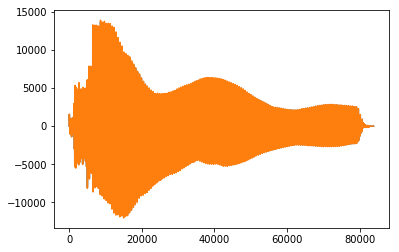

In [45]:
plt.plot(chord[1])

To check we're doing things correctly, let's write that data back to another file. By opening the original file and the file we've written, you should convinve yourself that the numpy array created by `wavfile.read` really does represent the audio signal of the wav file.

In [47]:
wavfile.write("data/test.wav", chord[0], chord[1])

### Possible subtlety here on stereo vs mono!!!

In [75]:
def to_mono(sound):
    if sound[1].shape[1] ==1:
        return sound
    else:
        aves = []
        for t in sound[1]:
            aves.append(np.mean(t))
        return sound[0], np.array(aves, dtype=np.int16)

In [76]:
new_chord = to_mono(chord)
new_chord[1]

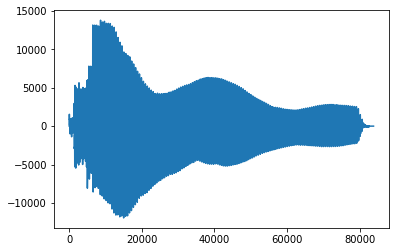

In [86]:
plt.plot(new_chord[1])

In [78]:
wavfile.write("data/test.wav", new_chord[0], new_chord[1])

### Applying the FFT
The Fourier transfrom is a way of breaking down a signal into its component parts. With audio signals, it tells us how we could have built up our original signal by combining certain elementary (sin and cosine) sound waves. It's a bit like "unmixing" coloured paint to find out how much red, blue and yellow went into a given colour. The process is quite complicated, so for the purposes of this notebook we will just understand it at this high level: given a signal, the Fourier transform gives us its decomposition into elementary waves, which is like a kind of fingerprint unique to that signal. The Fast Fourier Transform (FFT) is a particularly efficient algorithm for calculating the Fourier transform of a signal.

In [91]:
chord_transform = fftpack.rfft(new_chord[1])
chord_transform

array([ 1.01112000e+05,  1.12499153e+05,  9.23704002e+02, ...,
       -6.83353758e+01, -2.08448737e+02, -1.32400000e+03])

Here, `chord_transform` is an array listing how much of each frequency makes up the given signal. However, it isn't clear what exactly these frequencies are! Scipy can give us these too: we just need to tell `fftpack.fftfreq` how many discrete samples make up `new_chord`, and how much time each sample represents (this is the inverse of the sample rate).

In [97]:
freqs = fftpack.fftfreq(len(new_chord[1]), d=(1/new_chord[0]))

Now we can plot frequencies, against how much of each frequency made up our signal.

Text(0,0.5,'Fourier coefficient')

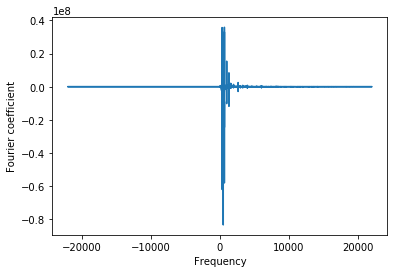

In [99]:
plt.plot(freqs, chord_transform)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier coefficient")

As we can see, the FFT seems to have calculated that our signal doesn't contain any negative frequencies! Negative frequency doesn't make much sense for sound waves, but for some other signals (e.g. a revolving wheel) it might have meaning. The negative frequencies are stored by `fftpack.fft` in the first `n/2` entries of each array. So we can ignore negatve frequencies like so.

Text(0,0.5,'Fourier coefficient')

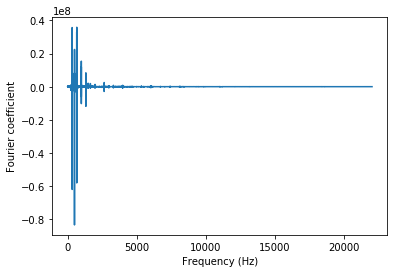

In [108]:
plt.plot(freqs[:int(len(freqs)/2)], chord_transform[:int(len(freqs)/2)])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier coefficient")

We have now obtained the fourier coefficients for our audio signal.

### Power Spectral Density
This is way faster to do than FFT! :D

In [112]:
psd = signal.periodogram(new_chord[1])
psd

(array([0.00000000e+00, 1.19345984e-05, 2.38691968e-05, ...,
        4.99976131e-01, 4.99988065e-01, 5.00000000e-01]),
 array([1.28297399e-21, 3.02110344e+05, 2.92487281e+05, ...,
        1.04438286e+02, 1.14860010e+00, 2.09210644e+01], dtype=float32))

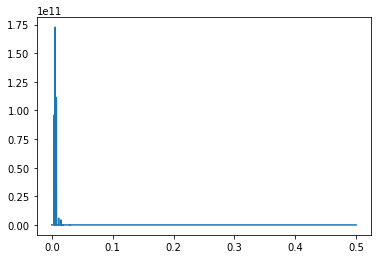

In [114]:
plt.plot(psd[0], psd[1])

## Comparing Yes and No
Blah Blah Blah

Let's do it!

In [126]:
yes = to_mono(wavfile.read("data/yes_male.wav"))
no = to_mono(wavfile.read("data/no_male.wav"))

In [182]:
yes_psd = signal.periodogram(yes[1], fs=yes[0])
no_psd = signal.periodogram(no[1], fs=no[0])

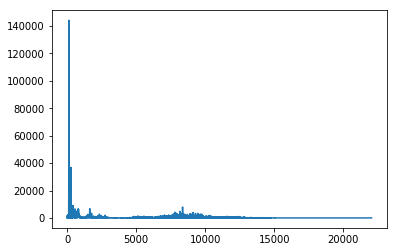

In [185]:
plt.plot(yes_psd[0], yes_psd[1])

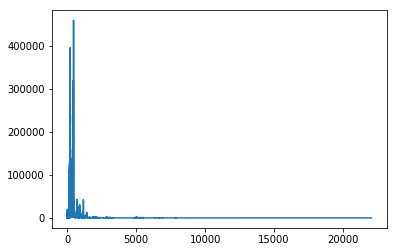

In [186]:
plt.plot(no_psd[0], no_psd[1])

We can see that the signal for "no" does not contain as much high-frequency as the signal for "yes". We will try to create a classifier based on this feature.